In [18]:
import numpy as np 
import pandas as pd
from pandas import Series, DataFrame
from scipy import stats
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from numpy.random import randn
%matplotlib inline

In [14]:
dataset =randn(25)

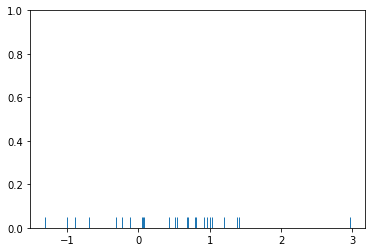

In [15]:
sns.rugplot(dataset)
# rug plot and carpet plot puta a tick when data appears 


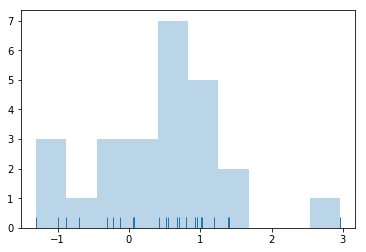

In [17]:
plt.hist(dataset, alpha = 0.3)
sns.rugplot(dataset)

(0, 1)

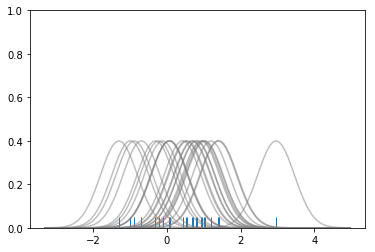

In [23]:
# manaul Kernal plot 
sns.rugplot(dataset)
x_min = dataset.min()-2
x_max = dataset.max()+2

x_axis = np.linspace(x_min,x_max,100)

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**0.2
kernel_list =[]
for data_point in dataset:
    # create a kernak for each point and append it to the kernal_list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    # scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel*0.4
    plt.plot(x_axis, kernel, color = 'grey', alpha = 0.5)
    
plt.ylim(0,1)

ValueError: x and y must have same first dimension, but have shapes (100,) and (1,)

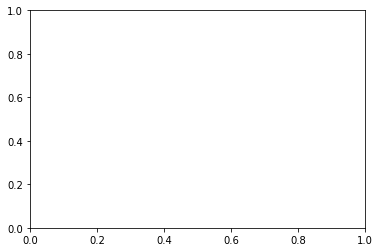

In [25]:
sum_of_kde = np.sum(kernal_list,axis=0)
flg = plt.plot(x_axis, sum_of_kde, color = 'indianred')
sns.rugplot(dataset)
plt.yticks([])
plt.suptitle('sum of the basic fundtions')

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


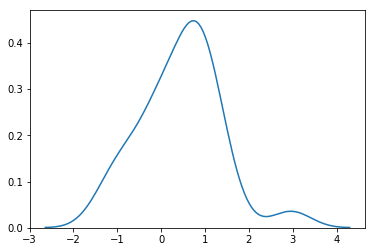

In [26]:
sns.kdeplot(dataset)

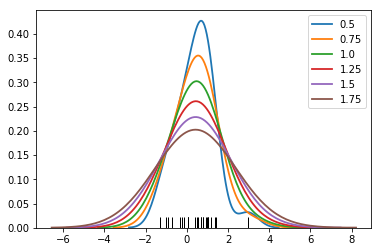

In [30]:
sns.rugplot(dataset, color = 'black')
for bw in np.arange(0.5, 2,0.25):
    sns.kdeplot(dataset,bw= bw, lw =1.8,label = bw)

In [31]:
url = 'http://en.wikipedia.org/wiki/kernal_(statistics)'

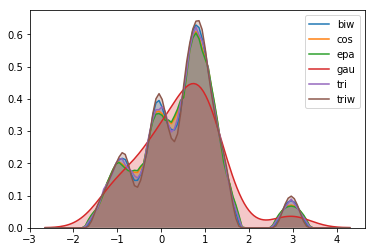

In [36]:
kernel_options =['biw','cos','epa','gau', 'tri','triw']
for kern in kernel_options:
    sns.kdeplot(dataset,kernel= kern, label = kern,shade = True)

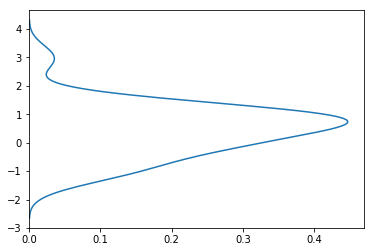

In [37]:
sns.kdeplot(dataset, vertical = True)

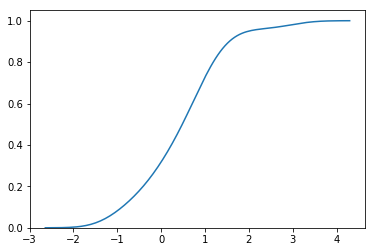

In [38]:
sns.kdeplot(dataset, cumulative = True)

/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


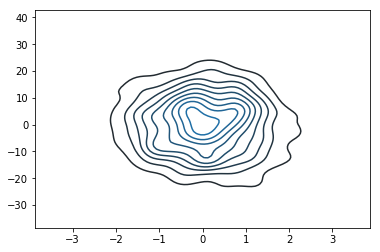

In [43]:
mean =[0,0]
cov = [[1,0],[0,100]]
dataset2 =np.random.multivariate_normal(mean,cov,1000)
dframe = pd.DataFrame(dataset2,columns=['X','Y'])
sns.kdeplot(dframe)

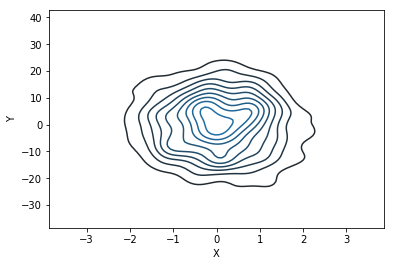

In [44]:
sns.kdeplot(dframe.X,dframe.Y)

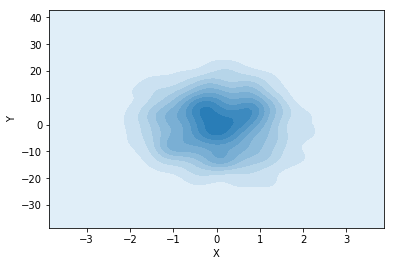

In [46]:
sns.kdeplot(dframe.X,dframe.Y,shade=True)

/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


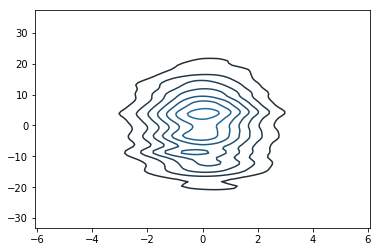

In [47]:
sns.kdeplot(dframe,bw=1)

/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


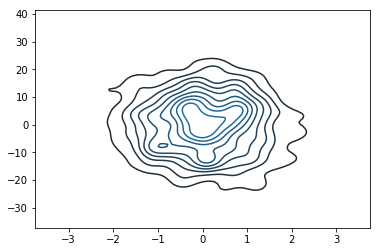

In [48]:
sns.kdeplot(dframe,bw ='silverman')

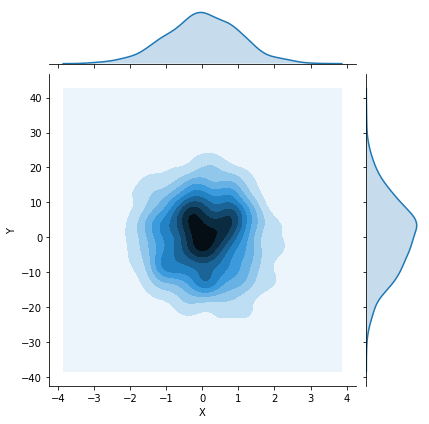

In [49]:
sns.jointplot('X','Y',dframe,kind='kde')